In [130]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../엑셀/Join_data.xlsx", index_col = 0)    

# 컬럼 추출
all2 = all[['DateTime', '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
        '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

all2 = all2.set_index("DateTime")

all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
            "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]]

# DateTime을 인덱스로 바꿔주기
df.head(2)

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,
2012-08-02,1131.7,-0.03,-0.05,-0.05,-0.05,-0.05,-0.01,0.030,0.04,0.04,0.04,-0.03,-0.04,-0.04,-0.04,-0.03,-0.03,1.75,2.5,1126.5
2012-08-03,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,2.4,1131.7
2012-08-06,1129.0,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,-0.04,0.01,0.01,0.00,0.00,0.01,0.01,-9.50,2.4,1134.8
2012-08-07,1128.8,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,-0.08,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.50,2.5,1129.0
2012-08-08,1128.3,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,-0.04,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,2.4,1128.8


In [131]:
x = df[['1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
          '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
          "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
           "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]]
y = df[["종가_ex"]]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled


<AxesSubplot:>

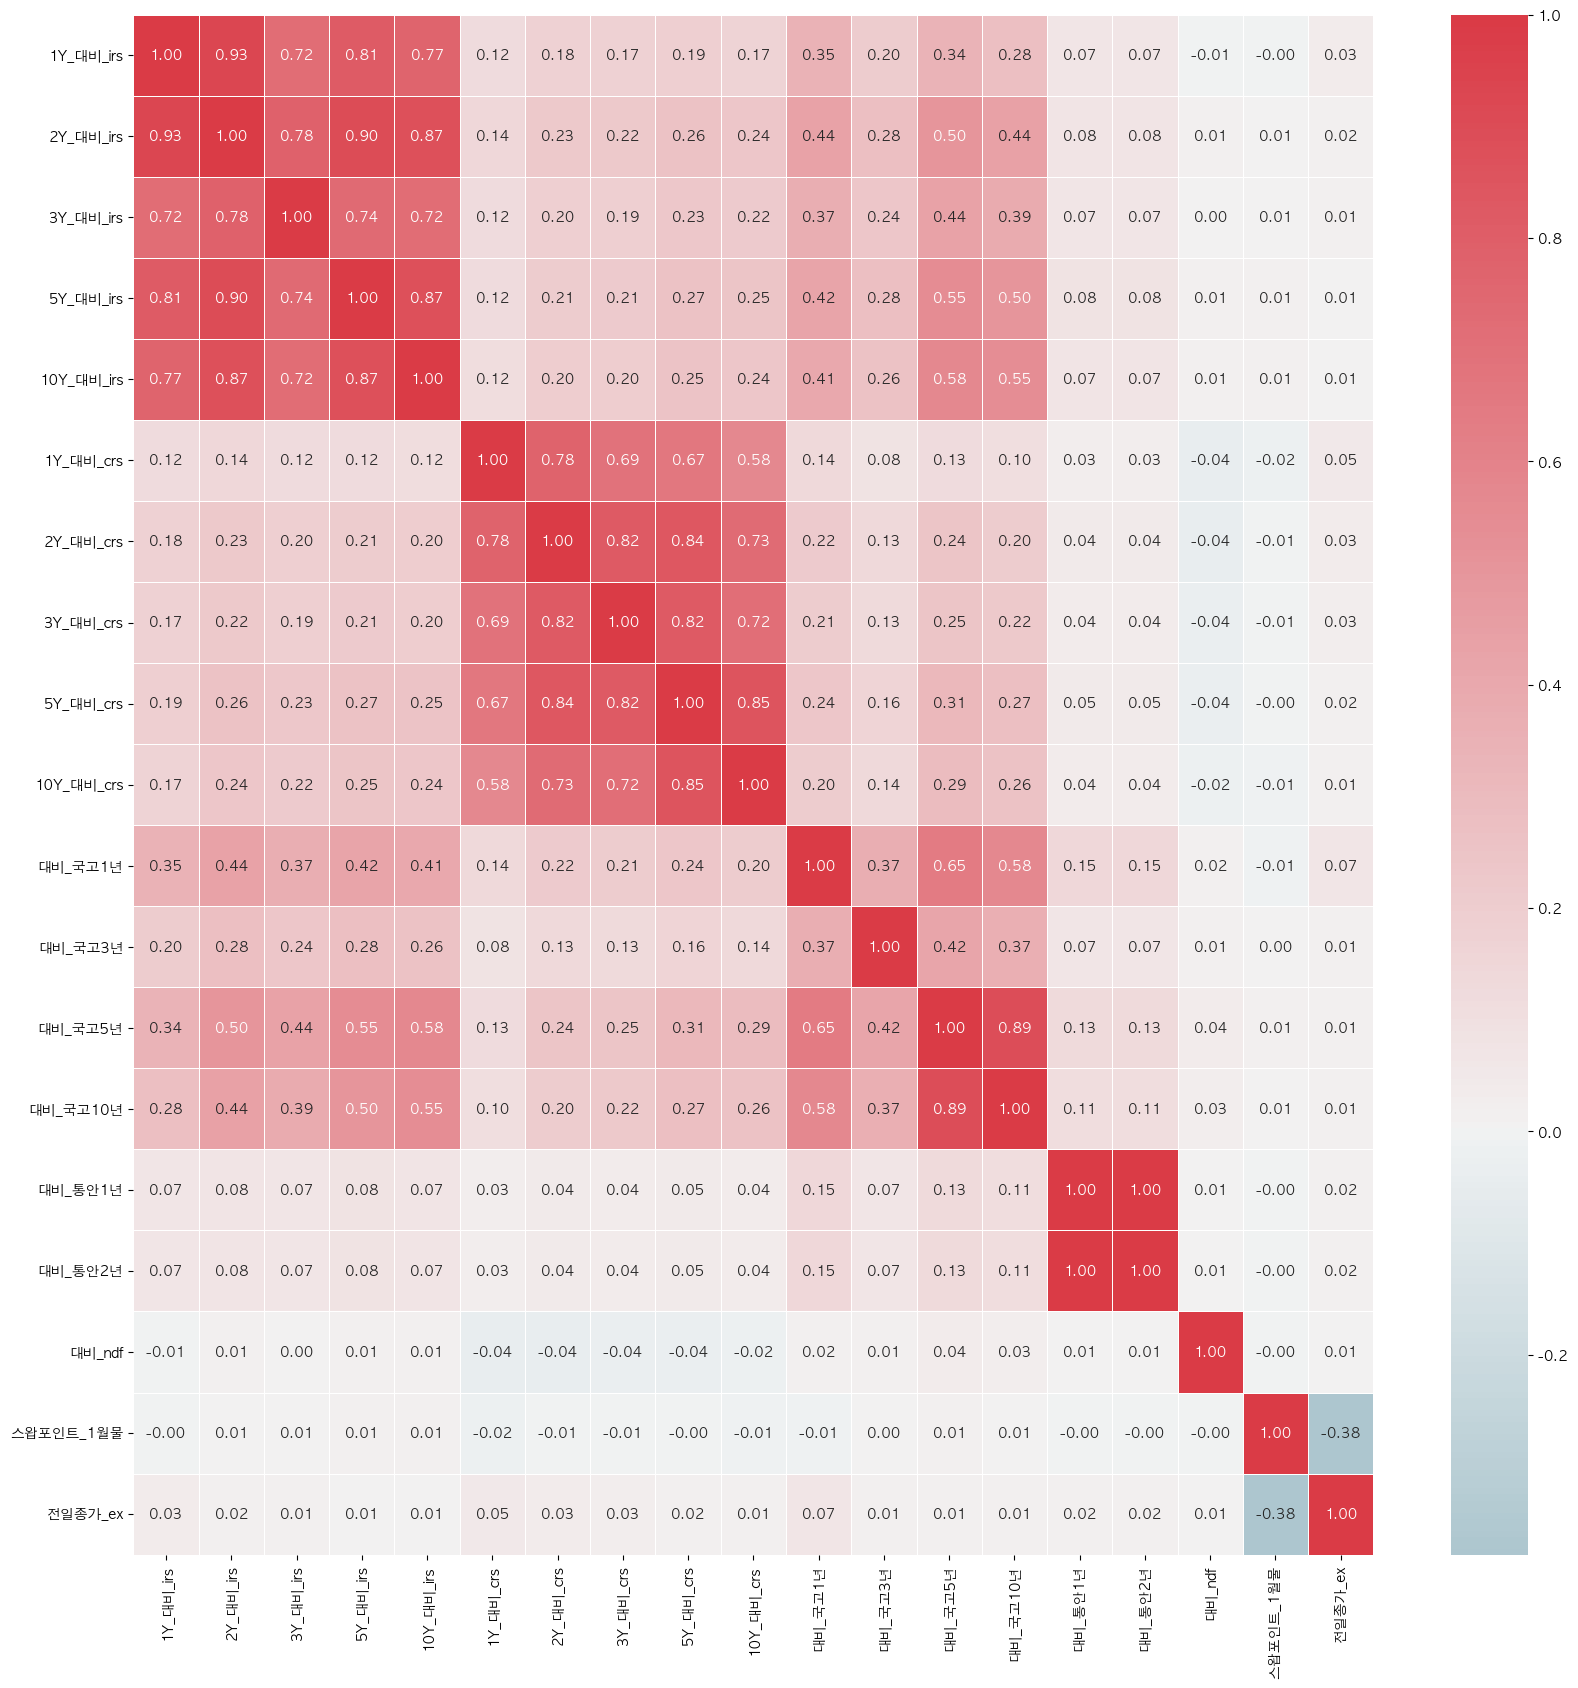

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.983912   1Y_대비_irs
1    19.535056   2Y_대비_irs
2     2.662612   3Y_대비_irs
3     6.468815   5Y_대비_irs
4     5.873196  10Y_대비_irs
5     2.651002   1Y_대비_crs
6     5.263985   2Y_대비_crs
7     3.830235   3Y_대비_crs
8     6.698649   5Y_대비_crs
9     3.717681  10Y_대비_crs
10    1.896718     대비_국고1년
11    1.253019     대비_국고3년
12    6.220870     대비_국고5년
13    5.053704    대비_국고10년
14         inf     대비_통안1년
15         inf     대비_통안2년
16    1.007465      대비_ndf
17    1.169044   스왑포인트_1월물
18    1.181827     전일종가_ex


In [135]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.420e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:13   Log-Likelihood:                -7641.5
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2440   BIC:                         1.543e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.1843      0.346      0.532      0.594      -0.495       0.863
2Y_대비_irs      0.5089      0.484      1.051      0.293      -0.441       1.459
3Y_대비_irs      0.0110      0.179      0.062      0.951      -0.340       0.362
5Y_대비_irs     -0.2658      0.279     -0.954      0.340      -0.812       0.281
10Y_대비_irs    -0.5155      0.266     -1.942      0.052      -1.036       0.005
1Y_대비_crs     -1.0803      0.178     -6.056      0.000      -1.430      -0.730
2Y_대비_crs     -0.2476      0.251     -0.985      0.325      -0.741       0.245
3Y_대비_crs     -0.4307      0.214     -2.009      0.045      -0.851      -0.010
5Y_대비_crs     -0.1643      0.284     -0.579      0.562      -0.720       0.392
10Y_대비_crs     0.1744      0.211      0.826      0.409      -0.240       0.589
대비_국고1년        0.1137      0.151      0.753      0.451      -0.182       0.410
대비_국고3년       -0.2692      0.123     -2.195      0.028      -0.510      -0.029
대비_국고5년        1.0280      0.273      3.762      0.000       0.492       1.564
대비_국고10년      -0.2598      0.246     -1.055      0.292      -0.743       0.223
대비_통안1년       -0.0022      0.055     -0.040      0.968      -0.111       0.107
대비_통안2년       -0.0022      0.055     -0.040      0.968      -0.111       0.107
대비_ndf         0.5274      0.110      4.796      0.000       0.312       0.743
스왑포인트_1월물     -0.1405      0.118     -1.186      0.236      -0.373       0.092
전일종가_ex       55.3505      0.119    464.705      0.000      55.117      55.584
==============================================================================
Omnibus:                       39.168   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.785
Skew:                          -0.024   Prob(JB):                     9.50e-17
Kurtosis:                       3.847   Cond. No.                     3.82e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [136]:
x_scaled.drop(['2Y_대비_irs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.929591   1Y_대비_irs
1     2.551843   3Y_대비_irs
2     5.803112   5Y_대비_irs
3     5.219271  10Y_대비_irs
4     2.648229   1Y_대비_crs
5     5.252685   2Y_대비_crs
6     3.827706   3Y_대비_crs
7     6.693030   5Y_대비_crs
8     3.717560  10Y_대비_crs
9     1.884701     대비_국고1년
10    1.246904     대비_국고3년
11    6.131489     대비_국고5년
12    5.039817    대비_국고10년
13         inf     대비_통안1년
14         inf     대비_통안2년
15    1.005197      대비_ndf
16    1.168991   스왑포인트_1월물
17    1.181016     전일종가_ex


In [137]:
x_scaled.drop(['대비_통안2년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.929591   1Y_대비_irs
1     2.551843   3Y_대비_irs
2     5.803112   5Y_대비_irs
3     5.219271  10Y_대비_irs
4     2.648229   1Y_대비_crs
5     5.252685   2Y_대비_crs
6     3.827706   3Y_대비_crs
7     6.693030   5Y_대비_crs
8     3.717560  10Y_대비_crs
9     1.884701     대비_국고1년
10    1.246904     대비_국고3년
11    6.131489     대비_국고5년
12    5.039817    대비_국고10년
13    1.024805     대비_통안1년
14    1.005197      대비_ndf
15    1.168991   스왑포인트_1월물
16    1.181016     전일종가_ex


In [138]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.503e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:19:12   Log-Likelihood:                -7642.1
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2441   BIC:                         1.542e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4677      0.217      2.153      0.031       0.042       0.894
3Y_대비_irs      0.0493      0.175      0.282      0.778      -0.294       0.393
5Y_대비_irs     -0.1718      0.264     -0.651      0.515      -0.689       0.346
10Y_대비_irs    -0.4224      0.250     -1.688      0.092      -0.913       0.068
1Y_대비_crs     -1.0863      0.178     -6.093      0.000      -1.436      -0.737
2Y_대비_crs     -0.2354      0.251     -0.937      0.349      -0.728       0.257
3Y_대비_crs     -0.4365      0.214     -2.036      0.042      -0.857      -0.016
5Y_대비_crs     -0.1557      0.283     -0.549      0.583      -0.712       0.400
10Y_대비_crs     0.1757      0.211      0.832      0.406      -0.239       0.590
대비_국고1년        0.1263      0.150      0.840      0.401      -0.169       0.421
대비_국고3년       -0.2602      0.122     -2.127      0.034      -0.500      -0.020
대비_국고5년        1.0624      0.271      3.916      0.000       0.530       1.594
대비_국고10년      -0.2733      0.246     -1.111      0.267      -0.756       0.209
대비_통안1년       -0.0066      0.111     -0.060      0.953      -0.224       0.211
대비_ndf         0.5329      0.110      4.851      0.000       0.317       0.748
스왑포인트_1월물     -0.1396      0.118     -1.179      0.239      -0.372       0.093
전일종가_ex       55.3472      0.119    464.827      0.000      55.114      55.581
==============================================================================
Omnibus:                       38.771   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.827
Skew:                          -0.021   Prob(JB):                     1.53e-16
Kurtosis:                       3.842   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
x_scaled.drop(['3Y_대비_irs', '5Y_대비_crs', '대비_통안1년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.609086   1Y_대비_irs
1     5.676249   5Y_대비_irs
2     5.098813  10Y_대비_irs
3     2.646360   1Y_대비_crs
4     4.561663   2Y_대비_crs
5     3.453283   3Y_대비_crs
6     2.433449  10Y_대비_crs
7     1.869214     대비_국고1년
8     1.245907     대비_국고3년
9     6.116907     대비_국고5년
10    5.039276    대비_국고10년
11    1.004788      대비_ndf
12    1.168969   스왑포인트_1월물
13    1.180649     전일종가_ex


In [140]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.827e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:20:21   Log-Likelihood:                -7642.3
No. Observations:                2459   AIC:                         1.531e+04
Df Residuals:                    2444   BIC:                         1.540e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4901      0.208      2.356      0.019       0.082       0.898
5Y_대비_irs     -0.1657      0.261     -0.635      0.525      -0.677       0.346
10Y_대비_irs    -0.4152      0.247     -1.679      0.093      -0.900       0.070
1Y_대비_crs     -1.0866      0.178     -6.099      0.000      -1.436      -0.737
2Y_대비_crs     -0.2837      0.234     -1.213      0.225      -0.742       0.175
3Y_대비_crs     -0.4738      0.203     -2.328      0.020      -0.873      -0.075
10Y_대비_crs     0.1091      0.171      0.638      0.523      -0.226       0.444
대비_국고1년        0.1274      0.150      0.851      0.395      -0.166       0.421
대비_국고3년       -0.2605      0.122     -2.131      0.033      -0.500      -0.021
대비_국고5년        1.0583      0.271      3.907      0.000       0.527       1.589
대비_국고10년      -0.2722      0.246     -1.107      0.268      -0.754       0.210
대비_ndf         0.5341      0.110      4.866      0.000       0.319       0.749
스왑포인트_1월물     -0.1397      0.118     -1.180      0.238      -0.372       0.092
전일종가_ex       55.3474      0.119    465.151      0.000      55.114      55.581
==============================================================================
Omnibus:                       38.678   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.599
Skew:                          -0.021   Prob(JB):                     1.72e-16
Kurtosis:                       3.841   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
x_scaled.drop(['10Y_대비_crs', '5Y_대비_irs', '스왑포인트_1월물'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.801128   1Y_대비_irs
1     3.618852  10Y_대비_irs
2     2.643232   1Y_대비_crs
3     4.163452   2Y_대비_crs
4     3.139925   3Y_대비_crs
5     1.864320     대비_국고1년
6     1.244845     대비_국고3년
7     6.047542     대비_국고5년
8     5.037323    대비_국고10년
9     1.004569      대비_ndf
10    1.010616     전일종가_ex


In [143]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.544e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:22:27   Log-Likelihood:                -7651.0
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2448   BIC:                         1.539e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.3832      0.183      2.088      0.037       0.023       0.743
10Y_대비_irs    -0.3550      0.206     -1.724      0.085      -0.759       0.049
1Y_대비_crs     -1.1116      0.178     -6.232      0.000      -1.461      -0.762
2Y_대비_crs     -0.2023      0.224     -0.904      0.366      -0.641       0.237
3Y_대비_crs     -0.4156      0.194     -2.137      0.033      -0.797      -0.034
대비_국고1년        0.3025      0.142      2.125      0.034       0.023       0.582
대비_국고3년       -0.1913      0.121     -1.579      0.114      -0.429       0.046
대비_국고10년       0.4587      0.160      2.869      0.004       0.145       0.772
대비_ndf         0.5469      0.110      4.971      0.000       0.331       0.763
전일종가_ex       55.3896      0.110    501.948      0.000      55.173      55.606
==============================================================================
Omnibus:                       42.028   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.638
Skew:                          -0.018   Prob(JB):                     1.87e-18
Kurtosis:                       3.892   Cond. No.                         4.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
x_scaled.drop(['2Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.827e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:24:55   Log-Likelihood:                -7651.4
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2449   BIC:                         1.538e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.3821      0.183      2.083      0.037       0.022       0.742
10Y_대비_irs    -0.3591      0.206     -1.744      0.081      -0.763       0.045
1Y_대비_crs     -1.1947      0.153     -7.818      0.000      -1.494      -0.895
3Y_대비_crs     -0.5204      0.156     -3.332      0.001      -0.827      -0.214
대비_국고1년        0.2977      0.142      2.093      0.036       0.019       0.577
대비_국고3년       -0.1933      0.121     -1.596      0.111      -0.431       0.044
대비_국고10년       0.4547      0.160      2.846      0.004       0.141       0.768
대비_ndf         0.5480      0.110      4.982      0.000       0.332       0.764
전일종가_ex       55.3901      0.110    501.976      0.000      55.174      55.606
==============================================================================
Omnibus:                       42.503   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.017
Skew:                          -0.014   Prob(JB):                     9.40e-19
Kurtosis:                       3.900   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
x_scaled.drop(['대비_국고3년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.178e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:25:16   Log-Likelihood:                -7652.6
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2450   BIC:                         1.538e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.678    1135.109
1Y_대비_irs      0.3715      0.183      2.025      0.043       0.012       0.731
10Y_대비_irs    -0.3605      0.206     -1.751      0.080      -0.764       0.043
1Y_대비_crs     -1.1954      0.153     -7.820      0.000      -1.495      -0.896
3Y_대비_crs     -0.5253      0.156     -3.364      0.001      -0.832      -0.219
대비_국고1년        0.2545      0.140      1.822      0.069      -0.019       0.528
대비_국고10년       0.4137      0.158      2.622      0.009       0.104       0.723
대비_ndf         0.5475      0.110      4.975      0.000       0.332       0.763
전일종가_ex       55.3920      0.110    501.863      0.000      55.176      55.608
==============================================================================
Omnibus:                       42.620   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.169
Skew:                          -0.021   Prob(JB):                     8.71e-19
Kurtosis:                       3.900   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
x_scaled.drop(['대비_국고1년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.629e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:25:43   Log-Likelihood:                -7654.3
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2451   BIC:                         1.537e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.678    1135.109
1Y_대비_irs      0.4396      0.180      2.447      0.014       0.087       0.792
10Y_대비_irs    -0.3900      0.205     -1.899      0.058      -0.793       0.013
1Y_대비_crs     -1.1892      0.153     -7.777      0.000      -1.489      -0.889
3Y_대비_crs     -0.5123      0.156     -3.282      0.001      -0.818      -0.206
대비_국고10년       0.5537      0.138      4.017      0.000       0.283       0.824
대비_ndf         0.5488      0.110      4.985      0.000       0.333       0.765
전일종가_ex       55.4060      0.110    502.981      0.000      55.190      55.622
==============================================================================
Omnibus:                       41.902   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.980
Skew:                          -0.027   Prob(JB):                     2.60e-18
Kurtosis:                       3.887   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 30.892668316879067, RMSE :  5.558, MAE: 5.558
Variance score :  0.990


In [157]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(8.146136044735758,
 array([ 4.27781489,  6.70399054,  5.72502255, 18.83668102,  5.18717123]),
 array([ -18.29970024,  -44.94348912,  -32.77588318, -354.82055178,
         -26.90674536]))